# MLP for Image Classification. **PART2**

Implement from scratch more advanced techniques.

## 0 - Mounting the personal Google Drive space

In [25]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/ColabNotebooks/AMLCV

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/ColabNotebooks/AMLCV


## 1 - Packages

In [26]:
import time
import numpy as np
import h5py
import matplotlib.pyplot as plt
import cv2
import sys
sys.path.append('/content/MyDrive/ColabNotebooks/AMLCV')
from MLP_utils import *
from test import *
from skimage.transform import *
from skimage.util import random_noise
from skimage.filters import gaussian
import random

%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

np.random.seed(1) # if you change the seed the pre-calculated auto-tests in the "test" python file will not throw valid results for you

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## 2 - Dataset

In [27]:
train_x_orig, train_y, test_x_orig, test_y, classes = load_data()

# Reshape the training and test examples 
train_x_flatten = train_x_orig.reshape(train_x_orig.shape[0], -1).T   # The "-1" makes reshape flatten the remaining dimensions
test_x_flatten = test_x_orig.reshape(test_x_orig.shape[0], -1).T

# Standardize data to have feature values between 0 and 1.
train_x = train_x_flatten/255.
test_x = test_x_flatten/255.

print ("train_x's shape: " + str(train_x.shape))
print ("test_x's shape: " + str(test_x.shape))

train_x's shape: (12288, 209)
test_x's shape: (12288, 50)


$12,288$ equals $64 \times 64 \times 3$ which is the size of one reshaped image vector.

## 3 - Previous model

Here are included all the functions of Part 1 of the lab practice. They are necessary to implement the MLP. In the next section some of them will be modified to adapt them to advanced techniques.

In [28]:
# ALL THE FUNCTIONS DEFINED IN PREVIOUS THE NOTEBOOK
# ALL THE FUNCTIONS DEFINED IN PREVIOUS THE NOTEBOOK
# ALL THE FUNCTIONS DEFINED IN PREVIOUS THE NOTEBOOK
# ALL THE FUNCTIONS DEFINED IN PREVIOUS THE NOTEBOOK

def initialize_parameters_deep(layer_dims):
    """
    Arguments:
    layer_dims -- python array (list) containing the dimensions of each layer in our network
    
    Returns:
    parameters -- python dictionary containing your parameters "W1", "b1", ..., "WL", "bL":
                    Wl -- weight matrix of shape (layer_dims[l], layer_dims[l-1])
                    bl -- bias vector of shape (layer_dims[l], 1)
    """
    
    np.random.seed(3)
    parameters = {}
    L = len(layer_dims)            # number of layers in the network

    for l in range(1, L):
        ### START CODE HERE ### (≈ 2 lines of code)
        parameters['W' + str(l)] = np.random.randn(layer_dims[l], layer_dims[l-1])*np.sqrt(2/layer_dims[l-1])
        parameters['b' + str(l)] = np.zeros((layer_dims[l], 1))
        ### END CODE HERE ###
        
        assert(parameters['W' + str(l)].shape == (layer_dims[l], layer_dims[l-1]))
        assert(parameters['b' + str(l)].shape == (layer_dims[l], 1))

        
    return parameters



def linear_forward(A, W, b):
    """
    Implement the linear part of a layer's forward propagation.

    Arguments:
    A -- activations from previous layer (or input data): (size of previous layer, number of examples)
    W -- weights matrix: numpy array of shape (size of current layer, size of previous layer)
    b -- bias vector, numpy array of shape (size of the current layer, 1)

    Returns:
    Z -- the input of the activation function, also called pre-activation parameter 
    cache -- a python tuple containing "A", "W" and "b" ; stored for computing the backward pass efficiently
    """
    
    ### START CODE HERE ### (≈ 1 line of code)
    Z = np.dot(W, A) + b
    ### END CODE HERE ###
    
    assert(Z.shape == (W.shape[0], A.shape[1]))
    cache = (A, W, b)
    
    return Z, cache



def linear_activation_forward(A_prev, W, b, activation):
    """
    Implement the forward propagation for the LINEAR->ACTIVATION layer

    Arguments:
    A_prev -- activations from previous layer (or input data): (size of previous layer, number of examples)
    W -- weights matrix: numpy array of shape (size of current layer, size of previous layer)
    b -- bias vector, numpy array of shape (size of the current layer, 1)
    activation -- the activation to be used in this layer, stored as a text string: "sigmoid" or "relu"

    Returns:
    A -- the output of the activation function, also called the post-activation value 
    cache -- a python tuple containing "linear_cache" and "activation_cache";
             stored for computing the backward pass efficiently
    """
    
    if activation == "sigmoid":
        # Inputs: "A_prev, W, b". Outputs: "A, activation_cache".
        ### START CODE HERE ### (≈ 2 lines of code)
        Z, linear_cache = linear_forward(A_prev, W, b)
        A, activation_cache = sigmoid(Z)
        ### END CODE HERE ###
    
    elif activation == "relu":
        # Inputs: "A_prev, W, b". Outputs: "A, activation_cache".
        ### START CODE HERE ### (≈ 2 lines of code)
        Z, linear_cache = linear_forward(A_prev, W, b)
        A, activation_cache = relu(Z)
        ### END CODE HERE ###
    
    assert (A.shape == (W.shape[0], A_prev.shape[1]))
    cache = (linear_cache, activation_cache)

    return A, cache



def L_model_forward(X, parameters):
    """
    Implement forward propagation for the [LINEAR->RELU]*(L-1)->LINEAR->SIGMOID computation
    
    Arguments:
    X -- data, numpy array of shape (input size, number of examples)
    parameters -- output of initialize_parameters_deep()
    
    Returns:
    AL -- last post-activation value
    caches -- list of caches containing:
                every cache of linear_activation_forward() (there are L-1 of them, indexed from 0 to L-1)
    """

    caches = []
    A = X
    L = len(parameters) // 2                  # number of layers in the neural network
    
    # Implement [LINEAR -> RELU]*(L-1). Add "cache" to the "caches" list.
    for l in range(1, L):
        A_prev = A 
        ### START CODE HERE ### (≈ 2 lines of code)
        A, cache = linear_activation_forward(A_prev, parameters['W' + str(l)], parameters['b' + str(l)], 'relu')
        caches.append(cache)
        ### END CODE HERE ###
    
    # Implement LINEAR -> SIGMOID. Add "cache" to the "caches" list.
    ### START CODE HERE ### (≈ 2 lines of code)
    AL, cache = linear_activation_forward(A, parameters['W' + str(L)], parameters['b' + str(L)], 'sigmoid')
    caches.append(cache)
    ### END CODE HERE ###
    
    assert(AL.shape == (1,X.shape[1]))
            
    return AL, caches



def compute_cost(AL, Y):
    """
    Implement the cost function defined by equation (7).

    Arguments:
    AL -- probability vector corresponding to your label predictions, shape (1, number of examples)
    Y -- true "label" vector (for example: containing 0 if non-cat, 1 if cat), shape (1, number of examples)

    Returns:
    cost -- cross-entropy cost
    """
    
    m = Y.shape[1]

    # Compute loss from aL and y.
    ### START CODE HERE ### (≈ 1 lines of code)
    cost = -np.mean(Y * np.log(AL) + (1 - Y) * np.log(1 - AL))
    ### END CODE HERE ###
    
    cost = np.squeeze(cost)      # To make sure your cost's shape is what we expect (e.g. this turns [[17]] into 17).
    assert(cost.shape == ())
    
    return cost



def linear_backward(dZ, cache):
    """
    Implement the linear portion of backward propagation for a single layer (layer l)

    Arguments:
    dZ -- Gradient of the cost with respect to the linear output (of current layer l)
    cache -- tuple of values (A_prev, W, b) coming from the forward propagation in the current layer

    Returns:
    dA_prev -- Gradient of the cost with respect to the activation (of the previous layer l-1), same shape as A_prev
    dW -- Gradient of the cost with respect to W (current layer l), same shape as W
    db -- Gradient of the cost with respect to b (current layer l), same shape as b
    """
    A_prev, W, b = cache
    m = A_prev.shape[1]

    ### START CODE HERE ### (≈ 3 lines of code)
    dW = (1/m) * np.dot(dZ, A_prev.T)
    db = ((1/m) * np.sum(dZ, axis=1)).reshape((-1,1))
    dA_prev = np.dot(W.T, dZ)
    ### END CODE HERE ###
    
    assert (dA_prev.shape == A_prev.shape)
    assert (dW.shape == W.shape)
    assert (db.shape == b.shape)
    
    return dA_prev, dW, db



def linear_activation_backward(dA, cache, activation):
    """
    Implement the backward propagation for the LINEAR->ACTIVATION layer.
    
    Arguments:
    dA -- post-activation gradient for current layer l 
    cache -- tuple of values (linear_cache, activation_cache) we store for computing backward propagation efficiently
    activation -- the activation to be used in this layer, stored as a text string: "sigmoid" or "relu"
    
    Returns:
    dA_prev -- Gradient of the cost with respect to the activation (of the previous layer l-1), same shape as A_prev
    dW -- Gradient of the cost with respect to W (current layer l), same shape as W
    db -- Gradient of the cost with respect to b (current layer l), same shape as b
    """
    linear_cache, activation_cache = cache
    
    if activation == "relu":
        ### START CODE HERE ### (≈ 2 lines of code)
        dZ = relu_backward(dA, activation_cache)
        dA_prev, dW, db = linear_backward(dZ, linear_cache)
        ### END CODE HERE ###
        
    elif activation == "sigmoid":
        ### START CODE HERE ### (≈ 2 lines of code)
        dZ = sigmoid_backward(dA, activation_cache)
        dA_prev, dW, db = linear_backward(dZ, linear_cache)
        ### END CODE HERE ###
    
    return dA_prev, dW, db



def L_model_backward(AL, Y, caches):
    """
    Implement the backward propagation for the [LINEAR->RELU] * (L-1) -> LINEAR -> SIGMOID group
    
    Arguments:
    AL -- probability vector, output of the forward propagation (L_model_forward())
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat)
    caches -- list of caches containing:
                every cache of linear_activation_forward() with "relu" (it's caches[l], for l in range(L-1) i.e l = 0...L-2)
                the cache of linear_activation_forward() with "sigmoid" (it's caches[L-1])
    
    Returns:
    grads -- A dictionary with the gradients
             grads["dA" + str(l)] = ... 
             grads["dW" + str(l)] = ...
             grads["db" + str(l)] = ... 
    """
    grads = {}
    L = len(caches) # the number of layers
    m = AL.shape[1]
    Y = Y.reshape(AL.shape) # after this line, Y is the same shape as AL
    
    # Initializing the backpropagation
    ### START CODE HERE ### (1 line of code)
    dAL = - (np.divide(Y, AL) - np.divide(1 - Y, 1 - AL))
    ### END CODE HERE ###
    
    # Lth layer (SIGMOID -> LINEAR) gradients. Inputs: "dAL, current_cache". Outputs: "grads["dAL-1"], grads["dWL"], grads["dbL"]
    ### START CODE HERE ### (approx. 2 lines)
    current_cache = caches[-1]
    grads["dA" + str(L-1)], grads["dW" + str(L)], grads["db" + str(L)] = linear_activation_backward(dAL, current_cache, 'sigmoid')
    ### END CODE HERE ###
    
    # Loop from l=L-2 to l=0
    for l in reversed(range(L-1)):
        # lth layer: (RELU -> LINEAR) gradients.
        # Inputs: "grads["dA" + str(l + 1)], current_cache". Outputs: "grads["dA" + str(l)] , grads["dW" + str(l + 1)] , grads["db" + str(l + 1)] 
        ### START CODE HERE ### (approx. 5 lines)
        current_cache = caches[l]
        dA_prev_temp, dW_temp, db_temp = linear_activation_backward(grads["dA" + str(l + 1)], current_cache, 'relu')
        grads["dA" + str(l)] = dA_prev_temp
        grads["dW" + str(l + 1)] = dW_temp
        grads["db" + str(l + 1)] = db_temp
        ### END CODE HERE ###

    return grads



def update_parameters(parameters, grads, learning_rate):
    """
    Update parameters using gradient descent
    
    Arguments:
    parameters -- python dictionary containing your parameters 
    grads -- python dictionary containing your gradients, output of L_model_backward
    
    Returns:
    parameters -- python dictionary containing your updated parameters 
                  parameters["W" + str(l)] = ... 
                  parameters["b" + str(l)] = ...
    """
    
    L = len(parameters) // 2 # number of layers in the neural network

    # Update rule for each parameter. Use a for loop.
    ### START CODE HERE ### (≈ 2 lines of code)
    for l in range(L):
        parameters["W" + str(l+1)] = parameters["W" + str(l+1)] - learning_rate * grads["dW" + str(l + 1)]
        parameters["b" + str(l+1)] = parameters["b" + str(l+1)] - learning_rate * grads["db" + str(l + 1)]
    ### END CODE HERE ###
    return parameters



def predict(X, y, parameters):
    """
    This function is used to predict the results of a  L-layer neural network.
    
    Arguments:
    X -- data set of examples you would like to label
    parameters -- parameters of the trained model
    
    Returns:
    p -- predictions for the given dataset X
    """
    
    m = X.shape[1]
    n = len(parameters) // 2 # number of layers in the neural network
    p = np.zeros((1,m))
    
    # Forward propagation
    probas, caches = L_model_forward(X, parameters)

    
    # convert probas to 0/1 predictions
    for i in range(0, probas.shape[1]):
        if probas[0,i] > 0.5:
            p[0,i] = 1
        else:
            p[0,i] = 0
    
    # print results
    # print ("predictions: " + str(p))
    # print ("true labels: " + str(y))
    print("Accuracy: "  + str(np.sum((p == y)/m)))
        
    return p

## 4- Advanced techniques

This section details all the advanced improvements implemented. Specifically:
 - Optimizer: **ADAM**
 - Learning rate schedule: **exponential decay** and **basic decay**
 - Regularization: **L2 regularization** and **data augmentation**

### i. Optimizer: **ADAM**

As an optimizer, it was decided to implement **ADAM**, based on Figure 1. Thus, the update of the model parameters (*update_parameters* function) is modified to take into account the 1st and 2nd order moments.

<img src="https://drive.google.com/uc?id=13B-SX-nJBbwO8Pgfyt7JYwjwkx-lt4Cc" style="width:650px;height:400px;">
<caption><center> <u>Figure 1</u>: Adam optimizer. <br> Image extracted from <em>Diederik P. Kingma and Jimmy Lei Ba. Adam : A method for stochastic optimization. In t ICLR 2015</em></b></i></center></caption>

It is important to mention that in this case the use of mini-batches was not considered because the training dataset has only 209 images.

### ii. Learning rate schedule

Two different protocols related to the number of iterations (epochs) are considered for the reduction of the learning rate throughout the optimization process:

- **Exponential**: $\alpha(t+1) = \alpha(t) \cdot 0.95^{\text{epoch}}$ 
- **Basic**: $\alpha(t+1) = \alpha(t) \cdot\frac{1}{1 + \; \text{decay} \; \cdot \; \text{epoch}}$ 

Where $\alpha$ is the learning rate. One of these functions will be called after each parameter update. The implemented function also includes the possibility to perform the lr update every *n_step* number of iterations instead of in all iterations.

### iii. Regularization

An **L2 regularization** was developed. For this purpose, the cost function is modified with the inclusion of a new term $\frac{λ}{2P}\sum_{l=1}^L ||\mathbf{W_l}||_F^2$ that penalizes large weights in favor of simple models. This implies modifying the update parameters rule, since the derivative of the cost function has also a new term: $-\frac{\alpha \cdot λ}{P} \cdot w(t)$

Notes: $P$ is the number of patterns, $\alpha$ the lr and λ the regularization factor.

Taking advantage of skimage library, we also expanded the training set by **data augmentation** techniques. In particular, the following transformations were considered: flip up-donw, flip left-right, noise, brightness, darkness.

## 5 - Advanced techniques implementation

In [29]:
class BasicOptimizer():
    """
    Performs the basic optimization of the MLP

    Arguments:
    alpha -- learning rate
    lambd -- L2 regularization factor. If 0 -> no regularization
    P -- number of patterns
    decay -- learning rate schedule decay factor
    n_step -- number of steps between learning rate schedule update. If 0 -> no lr schedule
    want_decay -- decay type (basic, exponential, not)
    """

    def __init__(self, alpha=0.005, lambd=0, P=1, decay=0.001, n_step=1, want_decay='no'):
        self.alpha = alpha
        self.lambd = lambd
        self.P = P
        self.decay = decay
        self.n_step = n_step
        self.want_decay = want_decay

    def update(self, parameters, grads, t):
        """
        Update parameters using gradient descent
        
        Arguments:
        parameters -- python dictionary containing your parameters 
        grads -- python dictionary containing your gradients, output of L_model_backward
        t -- number of actual iteration

        Returns:
        parameters -- python dictionary containing your updated parameters 
                      parameters["W" + str(l)] = ... 
                      parameters["b" + str(l)] = ...
        """
        L = len(parameters) // 2 # number of layers in the neural network

        # Update rule for each parameter. 
        for l in range(L):
            # We add at the end the L2 regularization term. If lambd=0, this term will be 0
            parameters["W" + str(l+1)] = parameters["W" + str(l+1)] - (self.alpha * grads["dW" + str(l + 1)]) - ((self.alpha*self.lambd*parameters["W" + str(l+1)]) / self.P)
            parameters["b" + str(l+1)] = parameters["b" + str(l+1)] - self.alpha * grads["db" + str(l + 1)]

        # Learning rate decay
        if self.want_decay == 'decay1':
            self.decay_alpha1(t)
        elif self.want_decay == 'decay2':
            self.decay_alpha2(t)

        return parameters


    ############################
    #### Learning rate schedules
    def decay_alpha1(self, epoch):
        """
        Learning rate schedule. Exponential decay

        Arguments:
        epoch -- number of actual epoch
        """
        if (self.n_step != 0) and (epoch % self.n_step == 0):
            self.alpha *= 0.95**epoch

    def decay_alpha2(self, epoch):
        """
        Learning rate schedule. Basic decay

        Arguments:
        epoch -- number of actual epoch
        """
        if (self.n_step != 0) and (epoch % self.n_step == 0):
            self.alpha *= (1. / (1. + self.decay * epoch))
    ############################

class AdamOptimizer(BasicOptimizer):
    """
    Performs an ADAM optimization of the MLP

    Arguments:
    alpha -- learning rate
    lambd -- L2 regularization factor
    P -- number of patterns
    decay -- learning rate schedule decay factor
    n_step -- number of steps between learning rate schedule update

    beta1 -- 1st momment exponmential decay
    beta2 -- 2nd momment exponmential decay
    epsilon -- avoid zero division
    """

    def __init__(self, parameters, alpha=0.001, beta1=0.9, beta2=0.999, epsilon=1e-8, lambd=0, P=1, decay=0.001, n_step=1, want_decay='no'):
        super().__init__(alpha, lambd, P, decay, n_step, want_decay)
        self.beta1 = beta1
        self.beta2 = beta2
        self.epsilon = epsilon

        # Initialize 1st, 2nd moments for w and b
        L = len(parameters) // 2 # number of layers in the neural networks
        m = {}
        v = {}
        for l in range(L):
            m["dW" + str(l+1)] = np.zeros((parameters["W" + str(l+1)]).shape)
            m["db" + str(l+1)] = np.zeros((parameters["b" + str(l+1)]).shape)
            v["dW" + str(l+1)] = np.zeros((parameters["W" + str(l+1)]).shape)
            v["db" + str(l+1)] = np.zeros((parameters["b" + str(l+1)]).shape)
        self.m = m
        self.v = v

    def update(self, parameters, grads, t):
        """
        Update parameters

        Arguments:
        parameters -- python dictionary containing your parameters 
        grads -- python dictionary containing your gradients, output of L_model_backward
        t -- number of actual iteration

        Returns:
        parameters -- python dictionary containing your updated parameters 
                      parameters["W" + str(l)] = ... 
                      parameters["b" + str(l)] = ...
        """

        L = len(parameters) // 2
        
        # Perform Adam update on all parameters
        for l in range(L):
            # Update biased 1st moment estimate for w and b
            self.m["dW" + str(l+1)] = self.beta1 * self.m["dW" + str(l+1)] + (1-self.beta1) * grads["dW" + str(l+1)]
            self.m["db" + str(l+1)] = self.beta1 * self.m["db" + str(l+1)] + (1-self.beta1) * grads["db" + str(l+1)]
            
            # Update biased 2st raw moment estimate for w and b
            self.v["dW" + str(l+1)] = self.beta2 * self.v["dW" + str(l+1)] + (1-self.beta2) * (np.square(grads["dW" + str(l+1)]))
            self.v["db" + str(l+1)] = self.beta2 * self.v["db" + str(l+1)] + (1-self.beta2) * (np.square(grads["db" + str(l+1)]))
            
            # Compute bias-corrected 1st moment estimate
            m_c_dw = self.m["dW" + str(l+1)] / (1-self.beta1**t)
            m_c_db = self.m["db" + str(l+1)] / (1-self.beta1**t)
            
            # Compute bias-corrected 2nd raw moment estimate
            v_c_dw = self.v["dW" + str(l+1)] / (1-self.beta2**t)
            v_c_db = self.v["db" + str(l+1)] / (1-self.beta2**t)
            
            # Update parameters
            # We add at the end the L2 regularization. If lambd=0, this term will be 0
            parameters["W" + str(l+1)] = parameters["W" + str(l+1)] - (self.alpha*(m_c_dw / (np.sqrt(v_c_dw) + self.epsilon))) - ((self.alpha*self.lambd*parameters["W" + str(l+1)]) / self.P)
            parameters["b" + str(l+1)] = parameters["b" + str(l+1)] - self.alpha*(m_c_db / (np.sqrt(v_c_db) + self.epsilon))
        
        # Learning rate decay
        if self.want_decay == 'decay1':
            self.decay_alpha1(t)
        elif self.want_decay == 'decay2':
            self.decay_alpha2(t)

        return parameters


In [30]:
def compute_cost_L2(AL, Y, parameters, lambd=0):
    """
    Implement the cost function with L2 regularization (if lambd>0).

    Arguments:
    AL -- probability vector corresponding to your label predictions, shape (1, number of examples)
    Y -- true "label" vector (for example: containing 0 if non-cat, 1 if cat), shape (1, number of examples)
    lambd -- regularization parameter. If lambd=0 -> not L2 regularization

    Returns:
    cost -- cross-entropy cost
    """
    
    m = Y.shape[1]

    # Compute cross entropy cost
    cost_cross_entropy = -np.mean(Y * np.log(AL) + (1 - Y) * np.log(1 - AL))
    
    # Compute regularization term. If lamd=0 -> not L2 regularization
    cost_L2 = 0
    if lambd != 0:
      L = len(parameters) // 2
      for l in range(L):
          cost_L2 += np.sum(np.square(np.ravel(parameters["W" + str(l+1)])))
      cost_L2 = cost_L2 * (lambd / (2 * m))

    cost = np.squeeze(cost_cross_entropy + cost_L2)
    assert(cost.shape == ())
    
    return cost


In [31]:
def L_layer_model(X, Y, layers_dims, params):
    """
    Implements a L-layer neural network: [LINEAR->RELU]*(L-1)->LINEAR->SIGMOID.
    
    Arguments:
    X -- data, numpy array of shape (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if cat, 1 if non-cat), of shape (1, number of examples)
    layers_dims -- list containing the input size and each layer size, of length (number of layers + 1).
    params -- dictionary of params:
        num_iterations -- int
        print_cost -- boolean
        optimizer -- str "basic" | "adam"
        alpha -- learning rate
        beta1, beta2, epsilon -- for adam optimizer
        lambd -- regularization
        decay -- Learning rate schedule decay.
        n_step -- number of steps between learning rate schedule update. If 0 -> no lr schedule
        want_decay -- decay type (basic, exponential, not)

    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """

    np.random.seed(1)
    costs = []                      
    
    # Parameters initialization
    parameters = initialize_parameters_deep(layers_dims)
    
    # Initialice optimizer
    if params['optimizer'] == "basic":
        optimizer = BasicOptimizer(params['alpha'], params['lambd'], Y.shape[1], params['decay'], params['n_step'], params['want_decay'])
    elif params['optimizer'] == "adam":
        optimizer = AdamOptimizer(parameters, params['alpha'], params['beta1'], params['beta2'], params['epsilon'], params['lambd'], Y.shape[1], params['decay'], params['n_step'], params['want_decay'])

    # Loop (gradient descent)
    for i in range(0, params['num_iterations']):

        # Forward propagation: [LINEAR -> RELU]*(L-1) -> LINEAR -> SIGMOID.
        AL, caches = L_model_forward(X, parameters)
        
        # Compute cost.
        cost = compute_cost_L2(AL, Y, parameters, params['lambd'])

        # Backward propagation.
        grads = L_model_backward(AL, Y, caches)
 
        # Update parameters.
        parameters = optimizer.update(parameters, grads, i+1)
                
        # Print the cost every 100 training example
        if params['print_cost'] and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
        if i % 100 == 0:
            costs.append(cost)
        
       
    # plot the cost
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per hundreds)')
    plt.title("Learning rate =" + str(params['alpha']))
    plt.show()
    
    return parameters

In [32]:
def data_augmentation(images, labels):
    """ Extend de data train-set through basic data augmentation techniques

    Arguments:
    images -- nd.array images
    labels -- real output (cat/non cat)
    """
    # For replicability
    random.seed(88)
    augmented_images = []
    augmented_labels = []

    for img, label in zip(images, labels[0]):
        # Original
        augmented_images.append(img)
        # Flip up-down
        augmented_images.append(np.flipud(img))
        # Flip lef-right
        augmented_images.append(np.fliplr(img))
        # Noise
        augmented_images.append(random_noise(img, mode='gaussian', var=random.uniform(0.005, 0.05)**2))
        # Brighness
        augmented_images.append(np.minimum(np.max(img), img + random.uniform(0.2, 0.4)*np.max(img)).astype(np.uint8))
        # Darkness
        augmented_images.append(np.maximum(np.min(img), img - random.uniform(0.3, 0.5)*np.min(img)).astype(np.uint8))
        
        # Add labels
        augmented_labels.extend([label] * 6)  # 6 -> one for each new image

    # Transform the resulting images list into a matrix where each row is the normalized flattened image
    augmented_images = np.array(augmented_images)
    augmented_images_flatten = augmented_images.reshape(augmented_images.shape[0], -1).T 
    train_x_augmented = augmented_images_flatten/255.
    # Transform the resulting labels list to a vector
    train_y_augmented = np.array(augmented_labels).reshape(-1,1).T
    
    print("train_x's shape: " + str(train_x_augmented.shape))
    print("train_y's shape: " + str(train_y_augmented.shape))

    return train_x_augmented, train_y_augmented

## 6 - TESTS

Here we check the possible improvements that will result from the application of the implemented techniques. 

Starting from a basic model without any of the enhancements:

Cost after iteration 0: 0.673694
Cost after iteration 100: 0.553525
Cost after iteration 200: 0.496839
Cost after iteration 300: 0.445280
Cost after iteration 400: 0.403112
Cost after iteration 500: 0.365524
Cost after iteration 600: 0.330240
Cost after iteration 700: 0.296330
Cost after iteration 800: 0.268457
Cost after iteration 900: 0.243226
Cost after iteration 1000: 0.219389
Cost after iteration 1100: 0.197826


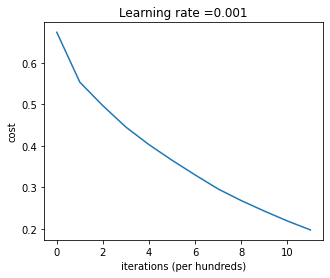

Accuracy: 0.9760765550239232
Accuracy: 0.68


In [33]:

layers_dims = [12288, 20, 30, 15, 1]
params = {
    'num_iterations' : 1200,
    'print_cost' : True,
    'optimizer' : 'basic',   # Not ADAM
    'alpha' : 0.001,         # Learning rate
    'beta1' : None,
    'beta2' : None,
    'epsilon' : 1e-12,
    'lambd' : 0,             # Not L2 regularization
    'decay' : 0,             # Not LR decay schedule
    'n_step' : 0,
    'want_decay' : 'no'
}
parameters = L_layer_model(train_x, train_y, layers_dims, params)
pred_train = predict(train_x, train_y, parameters)
pred_test = predict(test_x, test_y, parameters)


L2 regularization improvement -> from 0.68 to 0.7

Cost after iteration 0: 0.704927
Cost after iteration 100: 0.543698
Cost after iteration 200: 0.461798
Cost after iteration 300: 0.400739
Cost after iteration 400: 0.354839
Cost after iteration 500: 0.304258
Cost after iteration 600: 0.264443
Cost after iteration 700: 0.239124
Cost after iteration 800: 0.209388
Cost after iteration 900: 0.177833
Cost after iteration 1000: 0.144252
Cost after iteration 1100: 0.129418


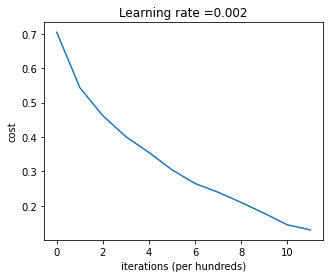

Accuracy: 0.9952153110047844
Accuracy: 0.7


In [34]:
layers_dims = [12288, 20, 30, 15, 1]
params = {
    'num_iterations' : 1200,
    'print_cost' : True,
    'optimizer' : 'basic',
    'alpha' : 0.002,
    'beta1' : None,
    'beta2' : None,
    'epsilon' : 1e-12,
    'lambd' : 0.1,      #  L2 regularization
    'decay' : 0,
    'n_step' : 0,
    'want_decay' : 'no'
}
parameters = L_layer_model(train_x, train_y, layers_dims, params)
pred_train = predict(train_x, train_y, parameters)
pred_test = predict(test_x, test_y, parameters)

Learning schedule improvement -> from 0.68 to 0.72

Cost after iteration 0: 0.673694
Cost after iteration 100: 0.503299
Cost after iteration 200: 0.351297
Cost after iteration 300: 0.217641
Cost after iteration 400: 0.175246
Cost after iteration 500: 0.159141
Cost after iteration 600: 0.152978
Cost after iteration 700: 0.151049
Cost after iteration 800: 0.150540
Cost after iteration 900: 0.150428


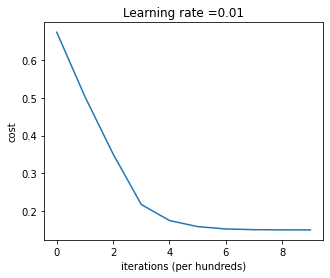

Accuracy: 0.9665071770334925
Accuracy: 0.72


In [35]:
layers_dims = [12288, 20, 30, 15, 1]
params = {
    'num_iterations' : 1000,
    'print_cost' : True,
    'optimizer' : 'basic',
    'alpha' : 0.01,
    'beta1' : None,
    'beta2' : None,
    'epsilon' : 1e-12,
    'lambd' : 0,
    'decay' : 0.0001,       # LR decay
    'n_step' : 5,           # each 5 epochs
    'want_decay' : 'decay2' # basic decay
}
parameters = L_layer_model(train_x, train_y, layers_dims, params)
pred_train = predict(train_x, train_y, parameters)
pred_test = predict(test_x, test_y, parameters)

ADAM improvement -> from 0.68 to 0.72. Much faster convergence (in 200 iters. the the loss was already down to 0.05)

Cost after iteration 0: 0.673694
Cost after iteration 100: 0.275047
Cost after iteration 200: 0.053855
Cost after iteration 300: 0.010048
Cost after iteration 400: 0.003785


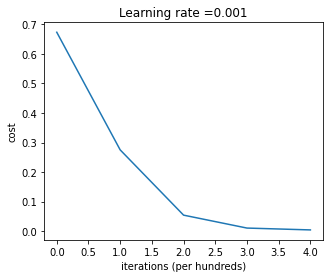

Accuracy: 0.9999999999999998
Accuracy: 0.72


In [36]:
layers_dims = [12288, 20, 30, 15, 1]
params = {
    'num_iterations' : 500,
    'print_cost' : True,
    'optimizer' : 'adam',   # ADAM optimizer
    'alpha' : 0.001,        
    'beta1' : 0.9,          # 1st moment decay
    'beta2' : 0.999,        # 2nd moment decay
    'epsilon' : 1e-12,
    'lambd' : 0,
    'decay' : 0,
    'n_step' : 0,
    'want_decay' : 'no'
}
parameters = L_layer_model(train_x, train_y, layers_dims, params)
pred_train = predict(train_x, train_y, parameters)
pred_test = predict(test_x, test_y, parameters)

## 7 - FINAL MODEL



train_x's shape: (12288, 1254)
train_y's shape: (1, 1254)
Cost after iteration 0: 0.682318
Cost after iteration 100: 0.453321
Cost after iteration 200: 0.256147
Cost after iteration 300: 0.196040
Cost after iteration 400: 0.122548
Cost after iteration 500: 0.113955


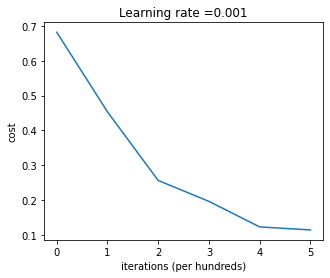

Accuracy: 0.9425837320574163
Accuracy: 0.74


In [37]:
# Data augmentation
train_x_augmented, train_y_augmented = data_augmentation(train_x_orig, train_y)

# Model
layers_dims = [12288, 20, 30, 15, 1]
params = {
    'num_iterations' : 600,
    'print_cost' : True,
    'optimizer' : 'adam',
    'alpha' : 0.001,
    'beta1' : 0.9,
    'beta2' : 0.999,
    'epsilon' : 1e-12,
    'lambd' : 0.01,
    'decay' : 0.0001,
    'n_step' : 10,
    'want_decay' : 'decay2'
}
parameters = L_layer_model(train_x_augmented, train_y_augmented, layers_dims, params)
pred_train = predict(train_x_augmented, train_y_augmented, parameters)
pred_test = predict(test_x, test_y, parameters)

In [39]:
import pickle
# Save model
pickle.dump(parameters, open('./final_model.pkl', 'wb'))

# Load the model from disk
loaded_model = pickle.load(open('./final_model.pkl', 'rb'))
pred_test = predict(test_x, test_y, parameters)


Accuracy: 0.74
